# Calculating Protein Cation Pi Bonds

We identify cation pi bonds for a 38 residue long protein in 150 mmol NaCl.

The sequence is KAKKYYYKYKNSGKYKYLKKARKYHRKGYKKYYGGGSS, which is half of the total sequence for mussel foot protein 5 of the Mediterranean mussel, *Mytilus galloprovincialis*.

Packages Required:

- MDAnalysis
- matplotlib
- os

In [1]:
from cation_pi_analysis import CationPiBondAnalysis
import MDAnalysis as mda
import matplotlib.pyplot as plt
import os

## Establish a Directory to Save Output Files

In [2]:
out_path = f'{os.getcwd()}/cation_pi_analysis_demo_out'
if os.path.exists(out_path) == False:
    os.mkdir(out_path)

## Loading Trajectory into Universe

In [29]:
project_path = f"{os.getcwd()}/demo_trajectory"
psf_in=f'{project_path}/ionized.psf'
dcd_in=f'{project_path}/trajectory.dcd'
u = mda.Universe(psf_in, dcd_in, in_memory=True, dt=2500)

## Find cation-pi bonds

The CationPiBondAnalysis class requires passing a pi system atom selection (`pi_sel`) and a cation atom selection (`cations_sel`) to `CationPiBondAnalysis`. 

In the following cell, `pi_sel="resname TYR and (name CG CD1 CD2 CE1 CE2 CZ)"` will select atoms in the pi system of tyrosine's sidechain. `cations_sel="(resname LYS and name NZ) or (resname ARG and name CZ)"` will select atoms in the sidechains of lysine and arginine that carry a net positive charge of +1. `c_p_cutoff` is set to 5.0, which is the minimum distances between the average position of atoms in each ring and an atom in cation sel to detect a cation pi bond.

In [30]:
cation_pi_bonds = CationPiBondAnalysis(
    universe=u,
    pi_sel="resname TYR and (name CG CD1 CD2 CE1 CE2 CZ)",
    cations_sel="(resname LYS and name NZ) or (resname ARG and name CZ)",
    c_p_cutoff=5.0,
    update_selections=True
)

We then use the `run()` method to perform the analysis. If we do not set the `start`, `stop`, and `step` for frames to analyse, all frames will be used.

In [31]:
cation_pi_bonds.run(verbose=True,
                         start=None,
                         stop=None,
                         step=1)

  0%|          | 0/60 [00:00<?, ?it/s]

## Accessing the results

Come up with a good way to store and access results other than just by number of bonds at each timestep.

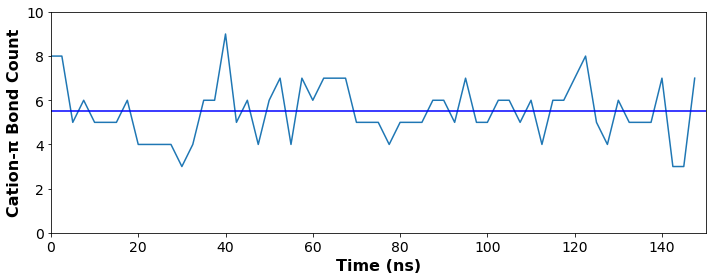

In [35]:
fig = plt.figure(figsize=([10,4]))
plt.plot(cation_pi_bonds.times/1000, cation_pi_bonds.results['cation_pi_bonds'])
plt.axhline(y=sum(cation_pi_bonds.results['cation_pi_bonds'])/len(cation_pi_bonds.results['cation_pi_bonds']),label=None,c='blue')
plt.xlabel('Time (ns)',fontweight='bold',fontsize=16)
plt.ylabel(f'Cation-\u03C0 Bond Count',fontweight='bold',fontsize=16)
plt.ylim([0,10])
plt.xlim([0,150])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(f'{out_path}/cation_pi_150ns_plot.jpeg')
plt.show()